In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_hub as hub

In [ ]:
import pandas as pd

In [ ]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print("Model Loaded")

Model Loaded


In [ ]:
df = pd.read_csv("new_df.csv", engine='python', encoding='utf-8', error_bad_lines=False)
df.head()

<ipython-input-281-59afba8dec24>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("new_df.csv", engine='python', encoding='utf-8', error_bad_lines=False)
Skipping line 896: unexpected end of data


,ID,title,description,duration,level,platform,images,urls,reviews_count,ratings,...,students_count,type,skills,prerequisites,domain,organization,course_certification_type,summary,instructor,lecture_count
0,1,(ISC)² Systems Security Certified Practitioner...,Pursue better IT security job opportunities an...,3 - 6 Months,Beginner,Coursera,https://upload.wikimedia.org/wikipedia/commons...,https://www.coursera.org/specializations/sscp-...,484,4.7ratings,...,"6,706",Not Available,"['Security Software', 'Risk Management', 'Acce...",Not Available,Not Available,ISC2,Specialization,[],,Not Available
1,2,.NET FullStack Developer,Develop the proficiency required to design and...,1 - 3 Months,Intermediate,Coursera,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://www.coursera.org/specializations/dot-n...,49,4.3ratings,...,"2,140",Not Available,"['Web API', 'Web Development', 'Cascading Styl...",Not Available,Not Available,BoardInfinity,Specialization,['Master .NET full stack web dev: from .NET co...,,Not Available
2,3,21st Century Energy Transition: how do we make...,"Affordable, abundant and reliable energy is fu...",1 - 3 Months,Beginner,Coursera,https://www.ualberta.ca/media-library/ualberta...,https://www.coursera.org/learn/21st-century-en...,59,4.8ratings,...,"4,282",Not Available,[],Not Available,Not Available,UniversityofAlberta,Course,['Understand the complexity of systems supplyi...,,Not Available
3,4,A Crash Course in Causality: Inferring Causal...,We have all heard the phrase “correlation does...,1 - 3 Months,Intermediate,Coursera,https://upload.wikimedia.org/wikipedia/commons...,https://www.coursera.org/learn/crash-course-in...,515,4.7ratings,...,"38,833",Not Available,[],Not Available,Not Available,UniversityofPennsylvania,Course,[],,Not Available
4,5,AI & Law,About this Course\nThis four-week course title...,1 - 4 Weeks,Beginner,Coursera,https://www.google.com/url?sa=i&url=https%3A%2...,https://www.coursera.org/learn/ai-law,361,4.7ratings,...,"25,442",Not Available,[],Not Available,Not Available,LundUniversity,Course,['Understand the legal significance of the art...,,Not Available


In [ ]:
df.isnull().sum()

ID                           0
title                        0
description                  0
duration                     0
level                        0
platform                     0
images                       0
urls                         0
reviews_count                0
ratings                      0
paid                         0
students_count               0
type                         0
skills                       0
prerequisites                0
domain                       0
organization                 0
course_certification_type    0
summary                      0
instructor                   0
lecture_count                0
dtype: int64

In [ ]:
import re

def clear_backslash(text):
    try:
        cleaned_text = re.sub(r'\\n', ' ', text)
        return cleaned_text
    except Exception as e:
        print(text)  # Return the original text in case of an error


In [ ]:
df['description'] = df['description'].apply(lambda x: clear_backslash(x))

In [ ]:
df.loc[df['skills'] == 'Not Available', 'skills'] = ""

In [ ]:
df.loc[df['domain'] == 'Not Available', 'domain'] = ""

In [ ]:
df2 = df[['ID', 'title', 'description', 'skills', 'domain', 'ratings', 'instructor', 'organization']]

In [ ]:
df2

,ID,title,description,skills,domain,ratings,instructor,organization
0,1,(ISC)² Systems Security Certified Practitioner...,Pursue better IT security job opportunities an...,"['Security Software', 'Risk Management', 'Acce...",,4.7ratings,,ISC2
1,2,.NET FullStack Developer,Develop the proficiency required to design and...,"['Web API', 'Web Development', 'Cascading Styl...",,4.3ratings,,BoardInfinity
2,3,21st Century Energy Transition: how do we make...,"Affordable, abundant and reliable energy is fu...",[],,4.8ratings,,UniversityofAlberta
3,4,A Crash Course in Causality: Inferring Causal...,We have all heard the phrase “correlation does...,[],,4.7ratings,,UniversityofPennsylvania
4,5,AI & Law,About this Course\nThis four-week course title...,[],,4.7ratings,,LundUniversity
...,...,...,...,...,...,...,...,...
889,890,The Bits and Bytes of Computer Networking,This course is designed to provide a full over...,[],,4.7ratings,,Google
890,891,The Business of Health Care,This Specialization was designed to help you k...,[],,4.6ratings,,UniversityofPennsylvania
891,892,The Business of Music Production,"In the current music industry, it is crucial t...","['Music business', 'Revenue streams', 'Teambui...",,4.8ratings,,Berklee
892,893,The DIY Musician,With social media platforms and powerful recor...,"['Strategy', 'Entrepreneurship', 'Planning', '...",,4.7ratings,,Berklee


In [ ]:
type(df2['skills'][0])

remove_first_last = lambda s: s[1:-1] if len(s) > 1 else s
df2['skills'] = df2['skills'].apply(remove_first_last)


<ipython-input-289-14ca2b28031d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['skills'] = df2['skills'].apply(remove_first_last)


In [ ]:
remove_quotes_and_spaces = lambda s: s.replace(" ", "").replace("'", "").replace(","," ")

# Apply the lambda function to the "your_column_name" column
df2['skills'] = df2['skills'].apply(remove_quotes_and_spaces)


<ipython-input-290-69d34bfbd8b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['skills'] = df2['skills'].apply(remove_quotes_and_spaces)


In [ ]:
df2['tags'] = df2['title'] + df2['description'] + df2['skills'] + df2['domain'] + df2['ratings'] + df2['instructor'] + df2['organization']

<ipython-input-291-da8352089a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tags'] = df2['title'] + df2['description'] + df2['skills'] + df2['domain'] + df2['ratings'] + df2['instructor'] + df2['organization']


In [ ]:
df2

,ID,title,description,skills,domain,ratings,instructor,organization,tags
0,1,(ISC)² Systems Security Certified Practitioner...,Pursue better IT security job opportunities an...,SecuritySoftware RiskManagement AccessControl ...,,4.7ratings,,ISC2,(ISC)² Systems Security Certified Practitioner...
1,2,.NET FullStack Developer,Develop the proficiency required to design and...,WebAPI WebDevelopment CascadingStyleSheets(CSS...,,4.3ratings,,BoardInfinity,.NET FullStack DeveloperDevelop the proficienc...
2,3,21st Century Energy Transition: how do we make...,"Affordable, abundant and reliable energy is fu...",,,4.8ratings,,UniversityofAlberta,21st Century Energy Transition: how do we make...
3,4,A Crash Course in Causality: Inferring Causal...,We have all heard the phrase “correlation does...,,,4.7ratings,,UniversityofPennsylvania,A Crash Course in Causality: Inferring Causal...
4,5,AI & Law,About this Course\nThis four-week course title...,,,4.7ratings,,LundUniversity,AI & LawAbout this Course\nThis four-week cour...
...,...,...,...,...,...,...,...,...,...
889,890,The Bits and Bytes of Computer Networking,This course is designed to provide a full over...,,,4.7ratings,,Google,The Bits and Bytes of Computer NetworkingThis ...
890,891,The Business of Health Care,This Specialization was designed to help you k...,,,4.6ratings,,UniversityofPennsylvania,The Business of Health CareThis Specialization...
891,892,The Business of Music Production,"In the current music industry, it is crucial t...",Musicbusiness Revenuestreams Teambuilding Copy...,,4.8ratings,,Berklee,The Business of Music ProductionIn the current...
892,893,The DIY Musician,With social media platforms and powerful recor...,Strategy Entrepreneurship Planning BrandManage...,,4.7ratings,,Berklee,The DIY MusicianWith social media platforms an...


In [ ]:
df2 = df2.drop(columns=['description', 'skills', 'domain', 'ratings', 'instructor', 'organization'])

In [ ]:
df2['tags'][0]

'(ISC)² Systems Security Certified Practitioner (SSCP)Pursue better IT security job opportunities and prove knowledge with confidence. The SSCP Professional Training Certificate shows employers you have the IT security foundation to defend against cyber attacks – and puts you on a clear path to earning SSCP certification.\nLearn on your own schedule with 120-day access to content aligned with the latest (ISC)2 SSCP exam domains. We’re offering the complete online self-paced program for only $1,000 – a $200 savings when you get all domains bundled together.\n3 Steps to Career Advancement \n1.  Register for the course \n2.  Gain access for 120 days \n3. Register and sit for the SSCP certification exam\nUpon completing the SSCP Professional Certificate, you will:\n1.  Complete six courses of preparing you to sit for the Systems Security Certified Practitioner (SSCP) certification exam Opens in a new tabas outlined below.\nCourse 1 - Access Controls\nCourse 2 - Security Operations and Admi

In [ ]:
def replace_newlines_and_numbers(input_string):
    # Use regular expressions to replace newline + number combinations with spaces
    result_string = re.sub(r'\n\d+', ' ', str(input_string))
    return result_string

df2['tags'] = df2['tags'].apply(replace_newlines_and_numbers)


In [ ]:
df2

,ID,title,tags
0,1,(ISC)² Systems Security Certified Practitioner...,(ISC)² Systems Security Certified Practitioner...
1,2,.NET FullStack Developer,.NET FullStack DeveloperDevelop the proficienc...
2,3,21st Century Energy Transition: how do we make...,21st Century Energy Transition: how do we make...
3,4,A Crash Course in Causality: Inferring Causal...,A Crash Course in Causality: Inferring Causal...
4,5,AI & Law,AI & LawAbout this Course\nThis four-week cour...
...,...,...,...
889,890,The Bits and Bytes of Computer Networking,The Bits and Bytes of Computer NetworkingThis ...
890,891,The Business of Health Care,The Business of Health CareThis Specialization...
891,892,The Business of Music Production,The Business of Music ProductionIn the current...
892,893,The DIY Musician,The DIY MusicianWith social media platforms an...


In [ ]:
def embed(text):
  return model(text)

In [ ]:
embeddings = embed(df2['tags'].tolist())

In [ ]:
embeddings.shape

TensorShape([894, 512])

In [ ]:
import matplotlib.pyplot as plt


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=250)
emb_2d = pca.fit_transform(embeddings)

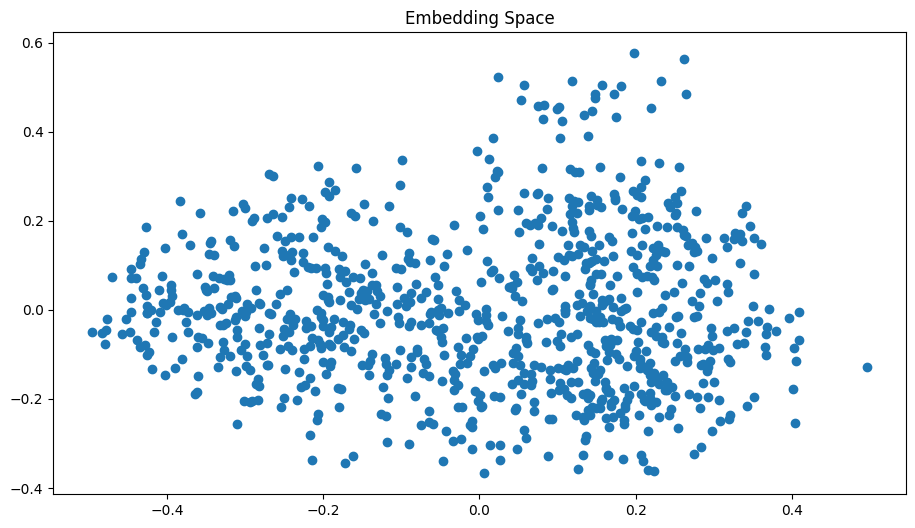

In [ ]:
plt.figure(figsize=(11, 6))
plt.title("Embedding Space")
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
knn = NearestNeighbors(n_neighbors=250)
knn.fit(embeddings)

NearestNeighbors(n_neighbors=250)

In [ ]:
def recommend(text):
    emb = embed([text])
    neighbours = knn.kneighbors(emb, return_distance=False)[0]

    recommendations = []

    for neighbor in neighbours:
        recommendation = {
            'ID': df['ID'].iloc[neighbor],
            'title': df['title'].iloc[neighbor],
            'description': df['description'].iloc[neighbor],
            'platform': df['platform'].iloc[neighbor]
        }
        recommendations.append(recommendation)

    return recommendations


In [ ]:
df[df['ID'] == 3994]

,ID,title,description,duration,level,platform,images,urls,reviews_count,ratings,...,students_count,type,skills,prerequisites,domain,organization,course_certification_type,summary,instructor,lecture_count


In [ ]:
print("Recommend Courses")

recommend("Stanford University")

Recommend Courses


[{'ID': 395,
  'title': 'Getting Started with AI using IBM Watson',
  'description': 'In this course you will learn how to quickly and easily get started with Artificial Intelligence using IBM Watson. You will understand how Watson works, become familiar with its use cases and real life client examples, and be introduced to several of Watson AI services from IBM that enable anyone to easily apply AI and build smart apps. You will also work with several Watson services to demonstrate AI in action.\nThis course does not require any programming or computer science expertise and is designed for anyone whether you have a technical background or not.\n',
  'platform': 'Coursera'},
 {'ID': 410,
  'title': 'Google Cloud Big Data and Machine Learning Fundamentals',
  'description': 'This course introduces the Google Cloud big data and machine learning products and services that support the data-to-AI lifecycle. It explores the processes, challenges, and benefits of building a big data pipeline 

In [ ]:
import pickle

In [ ]:
df[df['description'].isnull()]

,ID,title,description,duration,level,platform,images,urls,reviews_count,ratings,...,students_count,type,skills,prerequisites,domain,organization,course_certification_type,summary,instructor,lecture_count


In [ ]:
pickle.dump(knn, open('knn.pkl','wb'))